In [75]:
import numpy as np 
import pandas as pd 
import ipdb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv("Real estate.csv")
df.rename({'Ouse_price_of_unit_area': 'House_price_of_unit_area'}, axis = 1, inplace = True)
df.drop("No", axis = 1, inplace = True)
column_maping = {}
for i in df.columns:
    new_column = i[3:].capitalize().replace(' ', '_')
    column_maping[i] = new_column
# Now we will rename the column using the dictinary 
df.rename(columns = column_maping, inplace = True)
df.rename({'Ouse_price_of_unit_area': 'House_price_of_unit_area'}, axis = 1, inplace = True)
X  = df.drop(['Transaction_date', "House_price_of_unit_area"], axis = 1)
y = df['House_price_of_unit_area']

In [77]:

# Do not change the code below
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = np.asarray(X_scale)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)
# Do not change the code Above

# Add a column of ones to X_train and X_test to account for the bias term (intercept)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Perform SVD decomposition on the training data
U, s, VT = np.linalg.svd(X_train_b, full_matrices=False)

# Create diagonal matrix for Sigma
S_diag = np.diag(s)

# Compute the pseudo-inverse of the training data
X_train_pinv = VT.T @ np.linalg.inv(S_diag) @ U.T

# Calculate the weights (regression coefficients), including the bias term (intercept)
w = X_train_pinv @ y_train

# Make predictions using the testing set
y_pred = X_test_b @ w

se = (y_pred-y_test) ** 2
mse = se.mean()
rmse = mse**0.5
print(f"Root Mean Squre Error using SVD {rmse}")



Root Mean Squre Error using SVD 7.387891796775459


Root Mean Squre Error Ridge 7.387798950430715
7.387798950430715
Root Mean Squre Error Ridge 7.38697328534338
7.38697328534338
Root Mean Squre Error Ridge 7.379693013437837
7.379693013437837
Root Mean Squre Error Ridge 7.39620540310947
7.39620540310947
Root Mean Squre Error Ridge 11.238394958870039
11.238394958870039
Root Mean Squre Error Ridge 29.033427420684916
29.033427420684916
Root Mean Squre Error Ridge 37.290048013604675
37.290048013604675


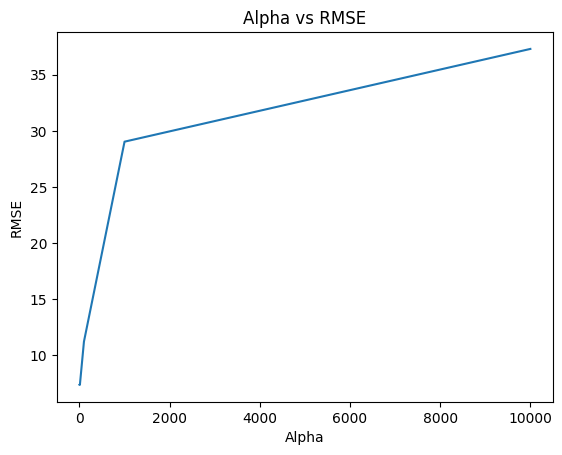

In [87]:
import matplotlib.pyplot as plt
class Model(object):
    """
     Ridge Regression.
    """

    def fit(self, X, y, alpha=0):
        """
        Fits the ridge regression model to the training data.

        Arguments
        ----------
        X: nxp matrix of n examples with p independent variables
        y: response variable vector for n examples
        alpha: regularization parameter.
        """
      
        intercept = np.ones((len(X),1))
        X_b = np.c_[intercept,X]
        
        I = np.identity(X_b.shape[1])
        
        betha_optim = np.linalg.inv(X_b.T.dot(X_b) + alpha*I).dot(X_b.T).dot(y)
        self.betas = betha_optim
        return betha_optim
   
    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.

        Arguments
        ----------
        X: nxp matrix of n examples with p covariates

        Returns
        ----------
        response variable vector for n examples
        """
       	# Your code here
        X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
        self.predictions = X_predictor.dot(self.betas)
        return self.predictions

    def rmse(self, X, y):
        """
        Returns the RMSE(Root Mean Squared Error) when the model is validated.
            
        Arguments
        ----------
        X: nxp matrix of n examples with p covariates
        y: response variable vector for n examples
            
        Returns
        ----------
        RMSE when model is used to predict y
        """
        y_predict = self.predict(X=X)
        se = (y_predict-y) ** 2
        mse = se.mean()
        rmse = mse**0.5
        return rmse

# Do not change the code below
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = np.asarray(X_scale)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)
my_model = Model()
#! TODO: USE DIFFERENT SETS OF ALPHA VALUES TO FIND THE BEST ALPHA
alphas = [0.01, 0.1, 1, 10, 100, 1000, 10000]
RMSES = []
for alpha in alphas:
    my_model.fit(X=X_train, y=y_train, alpha=alpha)
    rmse = my_model.rmse(X=X_test, y=y_test)
    RMSES.append(rmse)
    print(f"Root Mean Squre Error Ridge {rmse}")
    print(my_model.rmse(X=X_test, y=y_test))

# plot different alpha values against RMSE
plt.plot(alphas, RMSES)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE')
plt.show()


In [81]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error loss
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred)/ y_true.size

# Forward pass
def forward_pass(x, W_h1, b_h1, W_o, b_o):
    #TODO what is the output of the hidden layer
    a_h1 =  np.dot(x, W_h1) + b_h1
    #TODO apply activation to the output of the hidden layer 
    z_h1 = sigmoid(a_h1)
    #TODO use ouput of activation as input to the output layer (it is just similar to first layer but we don't apply activation)
    y_pred = np.dot(z_h1, W_o) + b_o
    return y_pred, z_h1, a_h1

# Backward pass
def backward_pass(x, y_true, y_pred, z_h1, a_h1, W_h1, W_o):
    # Derivative of loss with respect to y_pred
    #TODO What type of loss function are we using, what is it's derivative ?
    dL_dy_pred = mse_loss_derivative(y_true, y_pred)
    
    
    # Gradients for output layer
    #TODO remember the output layer is just a dense layer
    dL_dW_o = np.dot(z_h1.T, dL_dy_pred)
    
    dL_db_o = np.sum(dL_dy_pred, axis=0, keepdims=True)

    
    # Derivative of loss with respect to z_h1
    #TODO derivative with respect to the output of activation layer
    
    dL_dz_h1 = np.dot(dL_dy_pred, W_o.T)
    
    
    # Derivative of loss with respect to a_h1
    #TODO derivative with respect to the activation layer
    dL_da_h1 = dL_dz_h1 * sigmoid_derivative(a_h1)
    
    # Gradients for hidden layer
    dL_dW_h1 = np.dot(x.T, dL_da_h1)
    dL_db_h1 = np.sum(dL_da_h1, axis=0, keepdims=True)

    
    return dL_dW_h1, dL_db_h1, dL_dW_o, dL_db_o



scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = np.asarray(X_scale)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)


y_train = y_train.reshape((y_train.shape[0],1))


# Network architecture
input_size = 5 # Number of features
hidden_layer_size = 20 # Number of neurons in layer
output_size = 1 # predicted variable

# Initial random weights and biases for each layer
W_h1 = np.random.randn(input_size, hidden_layer_size) * 0.001
b_h1 = np.zeros((1, hidden_layer_size))
W_o = np.random.randn(hidden_layer_size, output_size) * 0.001
b_o = np.zeros((1, output_size))

learning_rate = 0.2

#To save the weights which give the lowest loss
lowest_loss = float('inf')
best_weights = None


for i in range(100):
    # Forward pass to get predictions
    y_pred, z_h1, a_h1 = forward_pass(X_train, W_h1, b_h1, W_o, b_o)
    loss = mse_loss(y_train, y_pred)

    if loss < lowest_loss:
        lowest_loss = loss
        # Save the best weights and biases
        best_weights = (W_h1.copy(), b_h1.copy(), W_o.copy(), b_o.copy())

    # Backward pass to get gradients
    
    dL_dW_h1, dL_db_h1, dL_dW_o, dL_db_o = backward_pass(X_train, y_train, y_pred, z_h1, a_h1, W_h1, W_o)

    # Now you would use the gradients to update the weights and biases
    W_h1 -= learning_rate * dL_dW_h1
    b_h1 -= learning_rate * dL_db_h1
    W_o -= learning_rate * dL_dW_o
    b_o -= learning_rate * dL_db_o


W_h1_best, b_h1_best, W_o_best, b_o_best = best_weights
y_pred_test, _, _ = forward_pass(X_test, W_h1_best, b_h1_best, W_o_best, b_o_best)
se = (y_pred_test-y_test) ** 2
mse = se.mean()
rmse = mse**0.5
print(f"Root Mean Squre Error 1 Layer MLP {rmse}")

#(331, 1)
#Root Mean Squre Error 1 Layer MLP 15.69657819926082

Root Mean Squre Error 1 Layer MLP 13.113716195628152


#### Bonus Lets add one more hidden layer (10 Points) 
### You must write down all gradients and complete the code below to get full bonus points


In [83]:


# Forward pass
def forward_pass(x, W_h1, b_h1, W_h2, b_h2, W_o, b_o):
    #TODO compute ouput of first hidden layer
    a_h1 = np.dot(x, W_h1) + b_h1
    z_h1 = sigmoid(a_h1) # apply activation to ouputs of first hidden layer
    
    #TODO compute ouput of second hidden layer
    a_h2 = np.dot(z_h1, W_h2) + b_h2
    z_h2 = sigmoid(a_h2) #apply activation to ouputs of first hidden layer
    
    # compute ouput of output layer, why don't we apply activation ?
    y_pred = np.dot(z_h2, W_o) + b_o
    
    return y_pred, z_h1, a_h1, z_h2, a_h2

# Backward pass
def backward_pass(x, y_true, y_pred, z_h1, a_h1, z_h2, a_h2, W_h1, W_h2, W_o):
    
    # Derivative of loss with respect to y_pred, what kind of loss are we using ?
    #TODO
    dL_dy_pred = mse_loss_derivative(y_true, y_pred)
    
    # Gradients for output layer
    #TODO
    dL_dW_o = np.dot(z_h2.T, dL_dy_pred)
    #TODO
    dL_db_o = np.sum(dL_dy_pred, axis=0, keepdims=True)
    
    # Derivative of loss with respect to z_h2
    #TODO
    dL_dz_h2 = np.dot(dL_dy_pred, W_o.T)
    
    # Derivative of loss with respect to a_h2
    #TODO
    dL_da_h2 =  dL_dz_h2 * sigmoid_derivative(a_h2)
    
    # Gradients for second hidden layer
    #TODO
    dL_dW_h2 =  np.dot(z_h1.T, dL_da_h2)
    #TODO
    dL_db_h2 =  np.sum(dL_da_h2, axis=0, keepdims=True)
    
    # Derivative of loss with respect to z_h1
    #TODO
    dL_dz_h1 =  np.dot(dL_da_h2, W_h2.T)
    
    # Derivative of loss with respect to a_h1
    #TODO
    dL_da_h1 =  dL_dz_h1 * sigmoid_derivative(a_h1)
    
    # Gradients for first hidden layer
    #TODO
    dL_dW_h1 =  np.dot(x.T, dL_da_h1)
    #TODO
    dL_db_h1 =  np.sum(dL_da_h1, axis=0, keepdims=True)
    
    return dL_dW_h1, dL_db_h1, dL_dW_h2, dL_db_h2, dL_dW_o, dL_db_o



# Random input and true output (modify these according to your dataset)
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = np.asarray(X_scale)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)
y_train = y_train.reshape((y_train.shape[0],1))

# Network architecture
input_size = 5 # Number of features
hidden_layer1_size = 100
hidden_layer2_size = 20
output_size = 1

# Initial random weights and biases for each layer
W_h1 = np.random.randn(input_size, hidden_layer1_size) * 0.001
b_h1 = np.zeros((1, hidden_layer1_size))
W_h2 = np.random.randn(hidden_layer1_size, hidden_layer2_size) * 0.001
b_h2 = np.zeros((1, hidden_layer2_size))
W_o = np.random.randn(hidden_layer2_size, output_size) * 0.001
b_o = np.zeros((1, output_size))


learning_rate = 0.1

#Training loop
for i in range(200):
    # Forward pass to get predictions
    y_pred, z_h1, a_h1, z_h2, a_h2 = forward_pass(X_train, W_h1, b_h1, W_h2, b_h2, W_o, b_o)
    #TODO Compute the loss
    # Backward pass to get gradients
    dL_dW_h1, dL_db_h1, dL_dW_h2, dL_db_h2, dL_dW_o, dL_db_o = backward_pass(X_train, y_train, y_pred, z_h1, a_h1, z_h2, a_h2, W_h1, W_h2, W_o)

    # Now you would use the gradients to update the weights and biases for each layer
    #TODO
    W_h1 -= learning_rate * dL_dW_h1
    #TODO
    b_h1 -= learning_rate * dL_db_h1
    
    #TODO
    W_h2 -= learning_rate * dL_dW_h2
    #TODO
    b_h2 -= learning_rate * dL_db_h2
    #TODO
    W_o -= learning_rate * dL_dW_o
    #TODO
    b_o -= learning_rate * dL_db_o

y_pred, _, _, _, _ = forward_pass(X_test, W_h1, b_h1, W_h2, b_h2, W_o, b_o)
# print(y_pred)
se = (y_pred-y_test) ** 2
mse = se.mean()
rmse = mse**0.5
print(f"Root Mean Squre Error 2 Layer MLP {rmse}")

Root Mean Squre Error 2 Layer MLP 13.113716211174902


In [80]:
%pip install keras
%pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


model = Sequential()


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform',  activation = 'relu')) #
model.add(Dropout(0.2))


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform', activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(400, kernel_initializer = 'he_uniform',activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Note: you may need to restart the kernel to use updated packages.
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached wrapt-1.16.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 467.1 kB/s eta 0:00:00a 0:00:01
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.4 MB/s eta 0:00:0000:0100:05
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cached gast-0.6.0

2024-11-11 14:21:26.172352: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 14:21:26.297861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731327686.328111  448831 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731327686.334264  448831 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 14:21:26.379476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,601 (1.23 MB)

 Trainable params: 323,601 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = np.asarray(X_scale)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)
y_train = y_train.reshape((y_train.shape[0],1))
history = model.fit(X_train, y_train,  epochs = 200, validation_data=(X_test, y_test), 
                    callbacks = EarlyStopping(monitor = 'val_loss',patience = 40))

Epoch 1/200
11/11 [==============================] - 1s 12ms/step - loss: 59.0233 - val_loss: 38.2307
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 60.5859 - val_loss: 38.7539
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 62.5126 - val_loss: 39.4410
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 56.5206 - val_loss: 41.2996
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 53.8750 - val_loss: 36.7995
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 62.7921 - val_loss: 42.3474
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 57.6418 - val_loss: 38.9120
Epoch 8/200
11/11 [==============================] - 0s 7ms/step - loss: 57.3855 - val_loss: 34.8828
Epoch 9/200
11/11 [==============================] - 0s 7ms/step - loss: 62.5909 - val_loss: 38.9493
Epoch 10/200
11/11 [==============================] - 0s 7ms/step - loss: 59.3074 - val_lo

In [ ]:
print(f"RMSE error using deeper neural network {model.evaluate(X_test, y_test)**0.5}")

3/3 [==============================] - 0s 3ms/step - loss: 45.4068
RMSE error using deeper neural network 6.738456462848816
